In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image

import matplotlib.pyplot as plt

import modules.images.utils as im

In [2]:
# Model configuration
TRAIN_DATA_DIR = 'data/cifar-100-test/train'
TEST_DATA_DIR = 'data/cifar-100-test/test'
TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 50
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
no_classes = 2
no_epochs = 50
validation_split = 0.3
verbosity = 1

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [3]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split)

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [4]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='same', activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 131074    
Total params: 150,466
Trainable params: 150,466
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
training = model.fit_generator(train_generator, epochs=no_epochs, validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
14/14 [==============================] - 20s 1s/step - loss: 112.5488 - accuracy: 0.5443 - val_loss: 3.0741 - val_accuracy: 0.5800
Epoch 2/50
14/14 [==============================] - 6s 446ms/step - loss: 1.0832 - accuracy: 0.7714 - val_loss: 0.9040 - val_accuracy: 0.7133
Epoch 3/50
14/14 [==============================] - 7s 512ms/step - loss: 0.5329 - accuracy: 0.7414 - val_loss: 0.5965 - val_accuracy: 0.7267
Epoch 4/50
14/14 [==============================] - 8s 600ms/step - loss: 0.4063 - accuracy: 0.8286 - val_loss: 0.7060 - val_accuracy: 0.7067
Epoch 5/50
14/14 [==============================] - 6s 440ms/step - loss: 0.2934 - accuracy: 0.8671 - val_loss: 0.5047 - val_accuracy: 0.8000
Epoch 6/50
14/14 [==============================] - 6s 460ms/step - loss: 0.1958 - accuracy: 0.9329 - val_loss: 0.4841 - val_accuracy: 0.8267
Epoch 7/50
14/14 [==============================] - 6s 444ms/step - loss

In [ ]:
# Visualize history
# Plot history: Loss
# plt.plot(training.history['val_loss'])
# plt.title('Validation loss history')
# plt.ylabel('Loss value')
# plt.xlabel('No. epoch')
# plt.show()

In [ ]:
# Visualize history
# Plot history: Loss
# plt.plot(training.history['loss'])
# plt.title('Validation loss history')
# plt.ylabel('Loss value')
# plt.xlabel('No. epoch')
# plt.show()

In [ ]:
# # Plot history: Accuracy
# plt.plot(training.history['val_accuracy'])
# plt.title('Validation accuracy history')
# plt.ylabel('Accuracy value (%)')
# plt.xlabel('No. epoch')
# plt.show()

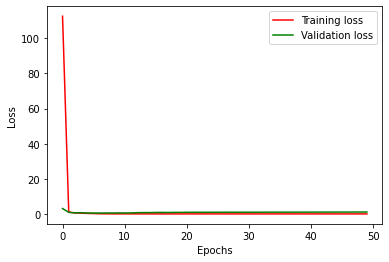

In [8]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [ ]:
plt.plot(training.history['accuracy'], color='red', label='Training accuracy')
plt.plot(training.history['val_accuracy'],  color='green', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [ ]:
from keras.models import Model
from keras.preprocessing import image
import numpy as np

layer_outputs = [layer.output for layer in model.layers]

test_image = "data/cifar-100-test/test/apple/0014.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

In [ ]:
display_activation(activations, 8, 4, 0)

In [ ]:
display_activation(activations, 8, 4, 1)